In [127]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [22]:
#Leemos el archivo a trabajar
df = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df.head(10)

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01-01-09,00:50,1.0,NaN,0.7550001,1.064,-0.149,8.87,1.332,-184.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01-01-09,01:00,1.0,NaN,0.8850001,0.992,-0.167,8.76,1.45,-183.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01-01-09,01:10,1.0,NaN,0.611,0.7270001,-0.126,8.72,1.5,-180.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01-01-09,01:20,1.0,NaN,0.33,0.886,-0.086,8.8,1.49,-185.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01-01-09,01:30,1.0,NaN,0.118,1.321,-0.071,8.69,1.422,-187.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Analizamos los tipos de variables disponibles
df.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [24]:
#Del paso anterior, vemos que hay variables inútiles que no ofrecen información; es decir, variables inútiles.

#Eliminamos las variables inútiles
df.drop( df.columns[18:36], axis=1, inplace=True )
df.drop( df.columns[2:4], axis=1, inplace=True )
df.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [25]:
#Creamos una nueva variable FECHA que junte las columnas DATE y TIME
df["FECHA"] = df["DATE"] + " "+ df["TIME"]

In [26]:
#Elimnamos las columnas "DATE" y "TIME"
df.drop( ["DATE","TIME"], axis=1, inplace=True )
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3,NaN
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40


In [27]:
#Eliminamos el renglón que contiene las unidades de las variables
df = df.drop(df.index[0]).reset_index(drop=True)
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [28]:
#Convertimos las variables de object a float64 para trabajar con ellas de manera numérica
df[df.columns[0:14]] = df[df.columns[0:14]].apply(pd.to_numeric, errors='coerce')
df.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [30]:
#Utilizamos la función corr() para encontrar lascorrelaciones entre variables
df_corr = df.corr(method='pearson', min_periods=1)
df_corr.head(140)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


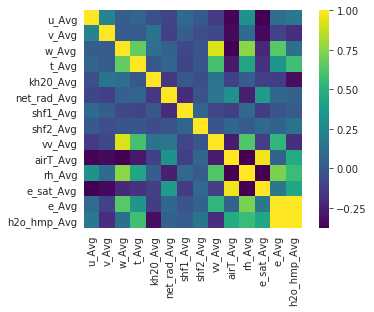

In [169]:
#Realizamos la gráfica de correlaciones con SeaBorn
sns_plot = sns.heatmap(df_corr,cmap="viridis",robust=True,square=True,annot=False)
fig = sns_plot.get_figure()
fig.savefig("snscorrelaciones",plt=2000)

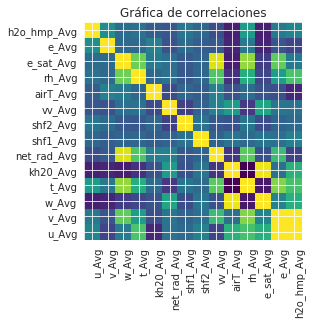

In [170]:
#Realizamos la gráfica de correlaciones con Matplotlib

fig, ax = plt.subplots()                    #Definimos la figura a realizar   

ax.set_xticks(np.arange(len(df_corr)))      #Establecemos el tamaño de los arreglos que nombran el eje X y el eje Y
ax.set_yticks(np.arange(len(df_corr)))

ax.set_xticklabels(df_corr)                 #Establecemos los nombres de cada variable en los ejes
ax.set_yticklabels(df_corr.columns[::-1])


plt.setp(ax.get_xticklabels(), rotation=90, #Rotamos los nombres del eje X para evitar encimarlos
         ha="right",rotation_mode="anchor")

ax.set_title("Gráfica de correlaciones")    #Título de la gráfica
#fig.tight_layout()                          #Empequeñecemos la gráfica para facilitar su visualización
plt.imshow(datos, cmap='viridis',           #Gráfica de correlaciones
           interpolation='nearest')
plt.savefig('mtpltcorrelaciones',plt=2000) 
plt.show()                                  #Mostramos la gráfica

In [157]:
#Creamos una matriz que contenga los valores que deseamos graficar

#Creamos las columnas de la matriz, llenándolas con los valores que cumplan la condición
col1 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['u_Avg'][i]) > 0.5):
            col1.append(df_corr['u_Avg'][i])
        elif (abs(df_corr['u_Avg'][i]) <= 0.5):
            col1.append(0.0)
        
col2 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['v_Avg'][i]) > 0.5):
            col2.append(df_corr['v_Avg'][i])
        elif (abs(df_corr['v_Avg'][i]) <= 0.5):
            col2.append(0.0)

col3 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['w_Avg'][i]) > 0.5):
            col3.append(df_corr['w_Avg'][i])
        elif (abs(df_corr['w_Avg'][i]) <= 0.5):
            col3.append(0.0)

col4 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['t_Avg'][i]) > 0.5):
            col4.append(df_corr['t_Avg'][i])
        elif (abs(df_corr['t_Avg'][i]) <= 0.5):
            col4.append(0.0)
            
col5 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['kh20_Avg'][i]) > 0.5):
            col5.append(df_corr['kh20_Avg'][i])
        elif (abs(df_corr['kh20_Avg'][i]) <= 0.5):
            col5.append(0.0)
            
col6 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['net_rad_Avg'][i]) > 0.5):
            col6.append(df_corr['net_rad_Avg'][i])
        elif (abs(df_corr['net_rad_Avg'][i]) <= 0.5):
            col6.append(0.0)

col7 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['shf1_Avg'][i]) > 0.5):
            col7.append(df_corr['shf1_Avg'][i])
        elif (abs(df_corr['shf1_Avg'][i]) <= 0.5):
            col7.append(0.0)
            
col8 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['shf2_Avg'][i]) > 0.5):
            col8.append(df_corr['shf2_Avg'][i])
        elif (abs(df_corr['shf2_Avg'][i]) <= 0.5):
            col8.append(0.0)
            
col9 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['vv_Avg'][i]) > 0.5):
            col9.append(df_corr['vv_Avg'][i])
        elif (abs(df_corr['vv_Avg'][i]) <= 0.5):
            col9.append(0.0)
            
col10 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['airT_Avg'][i]) > 0.5):
            col10.append(df_corr['airT_Avg'][i])
        elif (abs(df_corr['airT_Avg'][i]) <= 0.5):
            col10.append(0.0)
            
col11 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['rh_Avg'][i]) > 0.5):
            col11.append(df_corr['rh_Avg'][i])
        elif (abs(df_corr['rh_Avg'][i]) <= 0.5):
            col11.append(0.0)
            
col12 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['e_sat_Avg'][i]) > 0.5):
            col12.append(df_corr['e_sat_Avg'][i])
        elif (abs(df_corr['e_sat_Avg'][i]) <= 0.5):
            col12.append(0.0)
            
col12 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['e_sat_Avg'][i]) > 0.5):
            col12.append(df_corr['e_sat_Avg'][i])
        elif (abs(df_corr['e_sat_Avg'][i]) <= 0.5):
            col12.append(0.0)
            
col13 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['e_Avg'][i]) > 0.5):
            col13.append(df_corr['e_Avg'][i])
        elif (abs(df_corr['e_Avg'][i]) <= 0.5):
            col13.append(0.0)
                  
col14 = []
for i in range (0,len(df_corr)):
        if (abs(df_corr['h2o_hmp_Avg'][i]) > 0.5):
            col14.append(df_corr['h2o_hmp_Avg'][i])
        elif (abs(df_corr['h2o_hmp_Avg'][i]) <= 0.5):
            col14.append(0.0)

In [158]:
#Creamos una matriz a partir de las columnas 
matriz= [[col1[i],col2[i],col3[i],col4[i],col5[i],col6[i],col7[i],col8[i],col9[i],col10[i],col11[i],col12[i],col13[i],col14[i]] 
        for i in range(len(df_corr))]

#Convertimos la matriz en un DataFrame
df_matriz = pd.DataFrame(matriz)
df_matriz.columns = ['u_Avg','v_Avg','w_Avg','t_Avg','kh20_Avg','net_rad_Avg','shf1_Avg','shf2_Avg','vv_Avg','airT_Avg','rh_Avg','e_sat_Avg','e_Avg','h2o_hmp_Avg']
df_matriz.index = ['u_Avg','v_Avg','w_Avg','t_Avg','kh20_Avg','net_rad_Avg','shf1_Avg','shf2_Avg','vv_Avg','airT_Avg','rh_Avg','e_sat_Avg','e_Avg','h2o_hmp_Avg']
df_matriz

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v_Avg,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
w_Avg,0.0,0.0,1.000000,0.667294,0.0,0.0,0.0,0.0,0.923685,0.000000,0.760058,0.000000,0.641772,0.000000
t_Avg,0.0,0.0,0.667294,1.000000,0.0,0.0,0.0,0.0,0.593997,0.000000,0.000000,0.000000,0.000000,0.576896
kh20_Avg,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
net_rad_Avg,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
shf1_Avg,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
shf2_Avg,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
vv_Avg,0.0,0.0,0.923685,0.593997,0.0,0.0,0.0,0.0,1.000000,0.000000,0.624201,0.000000,0.525220,0.000000
airT_Avg,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,-0.501728,0.963527,0.000000,0.000000


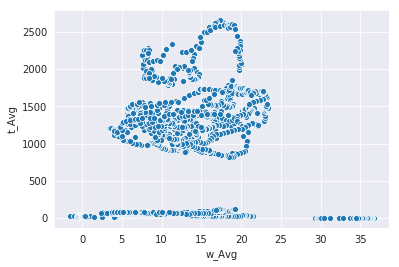

In [160]:
#Hacemos una gráfica para cada caso donde se cumple la condición
sns_plot = sns.scatterplot(x=df['w_Avg'],y=df['t_Avg'])

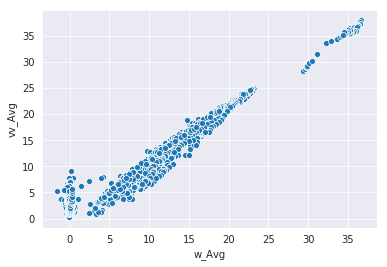

In [171]:
sns_plot = sns.scatterplot(x=df['w_Avg'],y=df['vv_Avg'])
fig = sns_plot.get_figure()
fig.savefig("corr1",plt=2000)

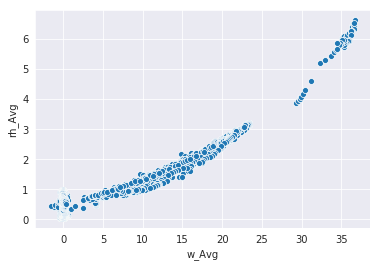

In [172]:
sns_plot = sns.scatterplot(x=df['w_Avg'],y=df['rh_Avg'])
fig = sns_plot.get_figure()
fig.savefig("corr2",plt=2000)

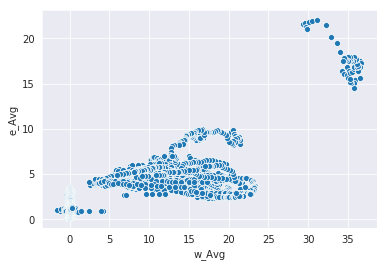

In [143]:
sns.scatterplot(x=df['w_Avg'],y=df['e_Avg'])

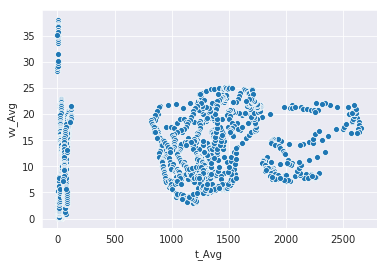

In [148]:
sns.scatterplot(x=df['t_Avg'],y=df['vv_Avg'])

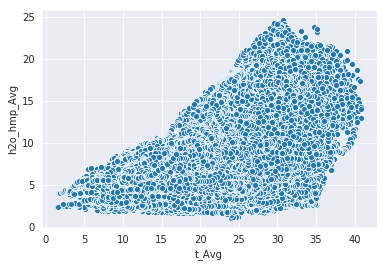

In [149]:
sns.scatterplot(x=df['t_Avg'],y=df['h2o_hmp_Avg'])

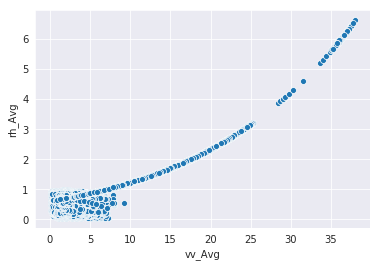

In [173]:
sns_plot = sns.scatterplot(x=df['vv_Avg'],y=df['rh_Avg'])
fig = sns_plot.get_figure()
fig.savefig("corr3",plt=2000)

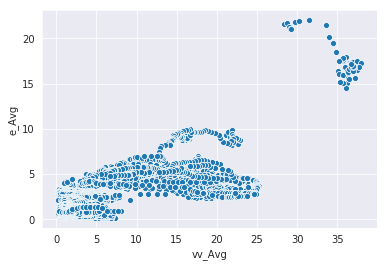

In [151]:
sns.scatterplot(x=df['vv_Avg'],y=df['e_Avg'])

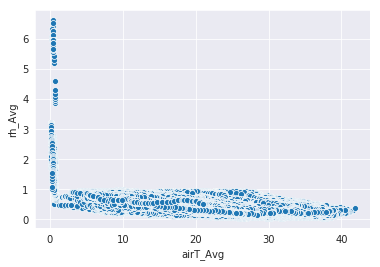

In [152]:
sns.scatterplot(x=df['airT_Avg'],y=df['rh_Avg'])

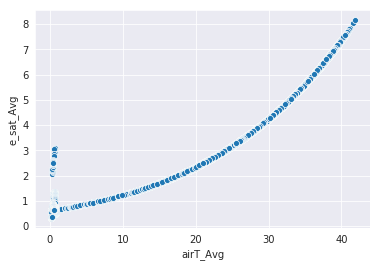

In [174]:
sns_plot = sns.scatterplot(x=df['airT_Avg'],y=df['e_sat_Avg'])
fig = sns_plot.get_figure()
fig.savefig("corr4",plt=2000)

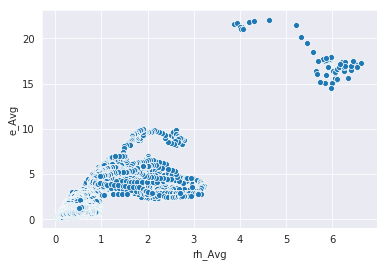

In [154]:
sns.scatterplot(x=df['rh_Avg'],y=df['e_Avg'])

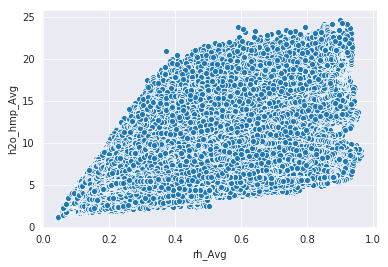

In [155]:
sns.scatterplot(x=df['rh_Avg'],y=df['h2o_hmp_Avg'])

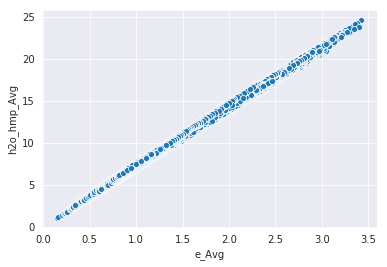

In [175]:
sns_plot = sns.scatterplot(x=df['e_Avg'],y=df['h2o_hmp_Avg'])
fig = sns_plot.get_figure()
fig.savefig("corr5",plt=2000)